# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 6 submission</b></u>

### Roster Name: David Danialy
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets  import load_digits

In [17]:
np.random.seed(42)

#### Code the solution

In [18]:
#Load the dataset
data = load_digits()

#Separate X and Y, and normalize X
X = data['images']
X = X.astype("float32") / 255
Y = data['target']

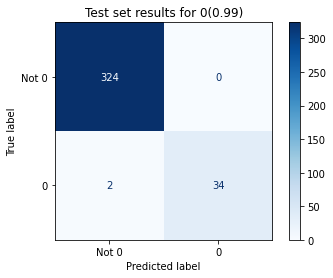

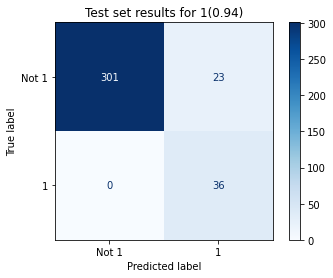

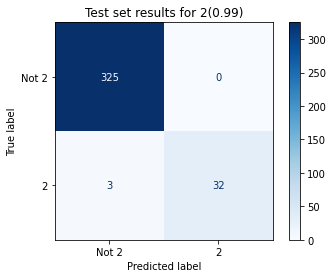

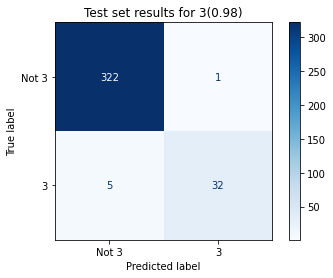

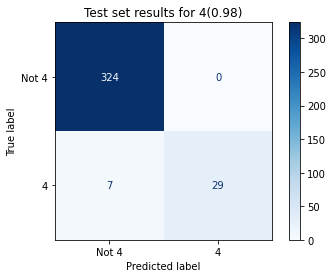

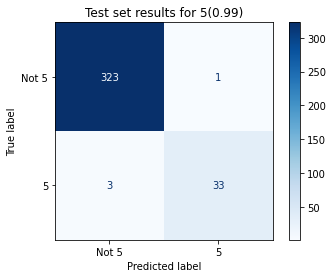

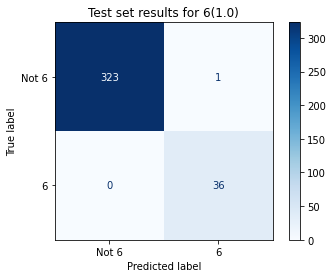

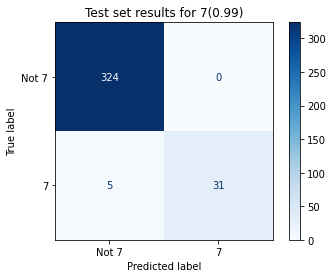

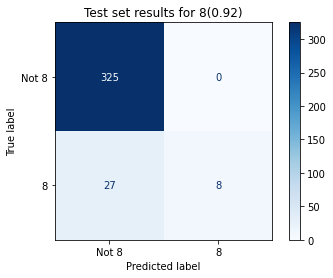

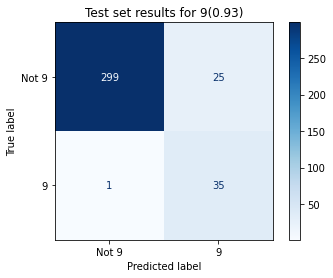

In [19]:
#Initialize lists to hold models and their corresponding accuracies
models = []
accuracies = []

#Loop once for each possible class label
for i in range(len(data['target_names'])):
    #Create a new model and append it 
    models.append(Perceptron(random_state=0))
    #Initialize temp arrays to store our modified data
    X_temp = []
    Y_temp = []

    #Change each class label depending on the index of the model, in order to create a dataset for
    #that model's one-vs-all classification
    for a in range(len(Y)):
        #If the class label matches the model index, append a positive case (1) to the Y data
        if Y[a] == i:
            X_temp.append(X[a].flatten())
            Y_temp.append(1)
        #Otherwise, append a 0
        else:
            X_temp.append(X[a].flatten())
            Y_temp.append(0)
    #Create the stratified train test split for the current model's dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=0, stratify=Y_temp)
    models[i].fit(X_train, Y_train)
    #Append the rounded accuracy to the accuracies list
    accuracies.append(round(models[i].score(X_test, Y_test), 2))
    #Plot a confusion matrix for each model
    disp = plot_confusion_matrix(models[i], X_test, Y_test,
                                 display_labels=['Not ' + str(i), str(i)],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title("Test set results for " + str(i) + '(' + str(accuracies[i]) + ')')
    plt.show()
